In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading new-plant-diseases-dataset.zip to ./new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [02:10<00:00, 22.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
#EDA(38 different leaf diseases)

len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
#removed rescaling after writing preprocessing function 

train_datagen= ImageDataGenerator(zoom_range= 0.5, shear_range=0.3, horizontal_flip= True, preprocessing_function= preprocess_input )

val_datagen= ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train= train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size= (256,256), batch_size=32)

val= val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#to figure out what kind of images are there
t_img, label= train.next()

In [ ]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show
#if we change the number in plt.imshow the color of the preprocessing image changes

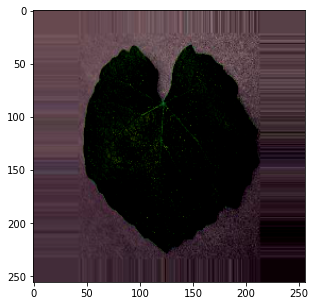

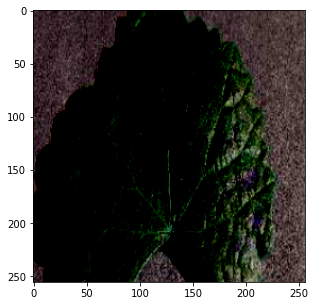

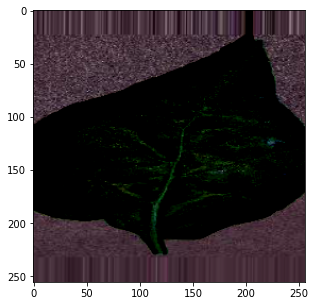

In [ ]:
#some kind of preprocessing is done by use of some parameter given in the above function
plotImage(t_img[:3], label[:3])

**BUILDING OUR MODEL**

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras



In [ ]:
base_model= VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X= Flatten()(base_model.output)

X= Dense(units= 38, activation= 'softmax')(X)

#Creating final model

model= Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

**EARLY STOPPING AND MODEL CHECKPOINT**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping: monitors our validation
es= EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose= 1)

#model checkpoint
mc= ModelCheckpoint(filepath= "best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta= 0.01,
                    patience= 3,
                    verbose= 1,
                    save_best_only= True)

#adding this to an array bc when we train our model it takes it as array

cb= [es,mc]

In [ ]:
his= model.fit_generator(train,
                         steps_per_epoch= 16,
                         epochs= 50,
                         verbose= 1,
                         callbacks= cb,
                         validation_data= val,
                         validation_steps= 16)

<ipython-input-21-7fdd02d932df>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his= model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.3254 - accuracy: 0.1680
Epoch 1: val_accuracy improved from -inf to 0.36914, saving model to best_model.h5
16/16 [==============================] - 24s 799ms/step - loss: 27.3254 - accuracy: 0.1680 - val_loss: 15.7884 - val_accuracy: 0.3691
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.7161 - accuracy: 0.3770
Epoch 2: val_accuracy improved from 0.36914 to 0.58008, saving model to best_model.h5
16/16 [==============================] - 15s 941ms/step - loss: 16.7161 - accuracy: 0.3770 - val_loss: 9.6140 - val_accuracy: 0.5801
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.2920 - accuracy: 0.5234
Epoch 3: val_accuracy improved from 0.58008 to 0.61719, saving model to best_model.h5
16/16 [==============================] - 13s 806ms/step - loss: 12.2920 - accuracy: 0.5234 - val_loss: 9.3560 - val_accuracy: 0.6172
Epoch 4/50
16/16 [==============================] - ETA: 0s 

In [ ]:
#our model got trained in different number of epochs everytime we run them, accuracy is fine.

h= his.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

NameError: ignored

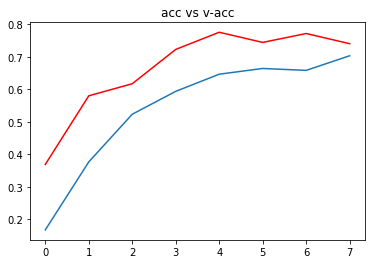

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

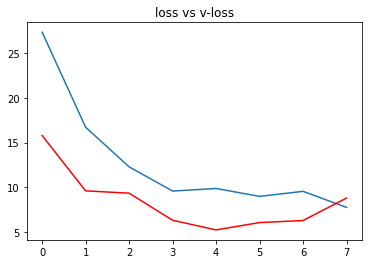

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model
model= load_model("/content/best_model.h5")

In [ ]:
#to evaluate our model

acc= model.evaluate_generator(val)[1]

print(f"The accuracy of your model is= {acc*100}%")

<ipython-input-26-9878eaec77c9>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= model.evaluate_generator(val)[1]


The accuracy of your model is= 75.66013932228088%


In [ ]:
ref= dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):

   img= load_img(path, target_size= (256,256))
   i= img_to_array(img)
   im= preprocess_input(i)
   img= np.expand_dims(im, axis=0)
   
   pred= np.argmax(model.predict(img))
   
   print(f"the image belongs to {ref[pred]}")

#we intially got an array, but if we change im to im.shape, we will get dimension. To make this work for our model, we are adding some parameter before im.shape


In [ ]:
path= "/content/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG"

prediction(path)

1/1 [==============================] - 1s 697ms/step
the image belongs to Corn_(maize)___Common_rust_


**STREAMLIT CODE**

In [ ]:
#streamlit code is written in a seperate file to prevent confusion

**FOR DEPLOYMENT USING NGROK**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip


--2022-12-02 04:22:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  3.90MB/s    in 3.4s    

2022-12-02 04:22:40 (3.90 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://55a2-34-87-171-156.ngrok.io


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2IJqzkmqImGBhCD1XdKYWRtjRAb_Zade5ZxmzaBgnc3yXGwx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!streamlit run /content/drive/MyDrive/minor_test5.py

  Stopping...
  Stopping...
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.8/logging/__init__.py", line 2111, in shutdown
    def shutdown(handlerList=_handlerList):
  File "/usr/local/lib/python3.8/dist-packages/streamlit/web/bootstrap.py", line 61, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.8/dist-packages/streamlit/web/server/server.py", line 333, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.8/dist-packages/streamlit/runtime/runtime.py", line 331, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.8/asyncio/base_events.py", line 764, in call_soon_threadsafe
    self._check_closed()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 508, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed
